# ЛР №2 Проведение исследований с логистической и линейной регрессией.
Датасеты: 'Loan new dataset' https://www.kaggle.com/datasets/willianoliveiragibin/financial-risk-v2 \
Задачей было определять, разрешат ли кредит клиенту - столбец LoanApproved (0 - не разрешено, 1 - разрешено) \
'medical_insurance' https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction \
Задачей было предсказывать цену страховки - столбец charges.

# 2. Логистическая и линейная регрессии

Загружаем датасет и смотрим его верхние строки

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

file_path = "loan.csv"
data_class = pd.read_csv(file_path)
data_class.head()



,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.0,7.249.720.460.524.030,11,126928,19.965.200.000.000.000,22.758.963.035.547.000,4.198.059.915.607.370,18.107.719.782.539.400,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,33.090.833.333.333.300,9.351.320.992.549.320,3,43609,207.045,2.010.771.214.969.360,7.940.542.382.198.960,3.898.524.480.253.530,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,33.936.666.666.666.600,8.722.406.105.782.900,6,5205,21.762.700.000.000.000,21.254.800.984.525.700,6.664.066.876.774.690,4.621.569.652.325.320,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.0,8.961.547.069.636.460,5,99452,300.398,3.009.108.491.496.010,10.475.069.802.292.900,3.130.983.116.604.640,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8.605.333.333.333.330,9.413.687.393.229.140,5,227019,197.184,17.599.017.877.532.800,33.017.914.048.482.300,7.020.984.743.780.870,1,36.0


То же самое для датасета медицинской страховки

In [22]:
file_path2 = "medical_insurance.csv"
data_regr = pd.read_csv(file_path2)
data_regr.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Посмотрим на распределение LoanApproved в датасете классификации:

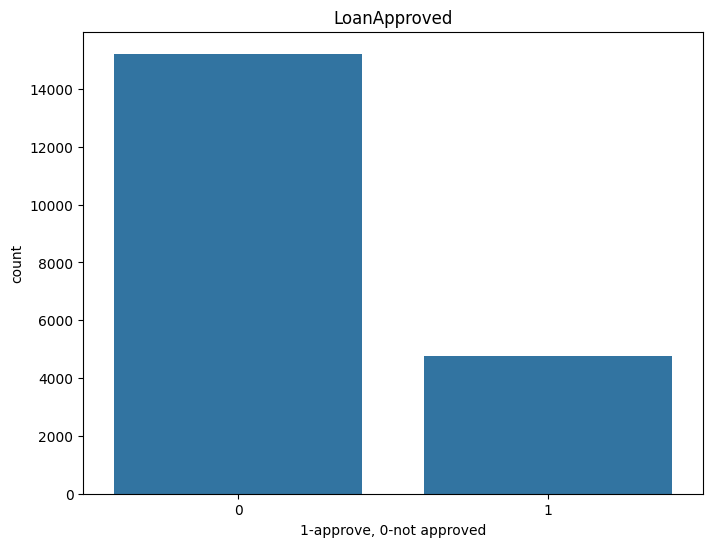

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='LoanApproved', data=data_class)
plt.title('LoanApproved')
plt.xlabel('1-approve, 0-not approved')
plt.ylabel('count')
plt.show()

Проведем чистку: удалим ненужный столбец ApplicationDate, кодируем категориальные фичи и разделим фичи на целевые и не целевые

In [24]:
data_class_cleaned = data_class.drop(columns=['ApplicationDate'])

imputer = SimpleImputer(strategy='mean')
numerical_columns = data_class_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_class_cleaned[numerical_columns] = imputer.fit_transform(data_class_cleaned[numerical_columns])

#кодирование категориальных фич

categorical_columns = data_class_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_class_cleaned[column] = le.fit_transform(data_class_cleaned[column].astype(str))
    label_encoders[column] = le

#разделение фич на целевую и не целевую
X = data_class_cleaned.drop(columns=['LoanApproved'])
y = data_class_cleaned['LoanApproved']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


Кодируем фичи для датасета регрессии

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_columns = data_regr.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_regr[column] = le.fit_transform(data_regr[column].astype(str))
    label_encoders[column] = le

from sklearn.model_selection import train_test_split

X = data_regr.drop('charges', axis=1)
y = data_regr['charges']

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X, y, test_size=0.2, random_state=42)

Обучение моделей линейной и логистической регрессии. В качестве метрики качества будем использовать accuracy

In [26]:
model_linRegr = LinearRegression()
model_linRegr.fit(X_train_regr, y_train_regr)

model_logRegr = LogisticRegression()
model_logRegr.fit(X_train_class, y_train_class)


LogisticRegression()

In [28]:
predicted_class = model_logRegr.predict(X_test_class)
print("classif. accuracy: ",metrics.accuracy_score(y_test_class,predicted_class))

classif. accuracy:  0.994


Получаем достаточно высокие значения accuracy - 0.994.

В качестве метрик качества модели линейной регрессии используем MSE и R2 scrore

In [30]:
predicted_regr = model_linRegr.predict(X_test_regr)
print("MSE: ",metrics.mean_squared_error(y_test_regr, predicted_regr))
print("R2: ",metrics.r2_score(y_test_regr, predicted_regr))

MSE:  39922479.35435013
R2:  0.7398864322395977


Получаем неплохие результаты - R2=0.74. Есть потенциал для улучшния. Построим графики для обоих задач, чтобы визуализировать ошибки

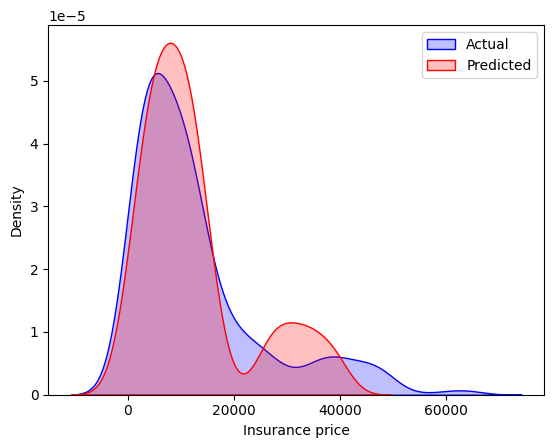

In [31]:
import seaborn as sns
sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_regr, label='Predicted', color='red', fill=True)
plt.xlabel('Insurance price')
plt.ylabel('Density')
plt.legend()

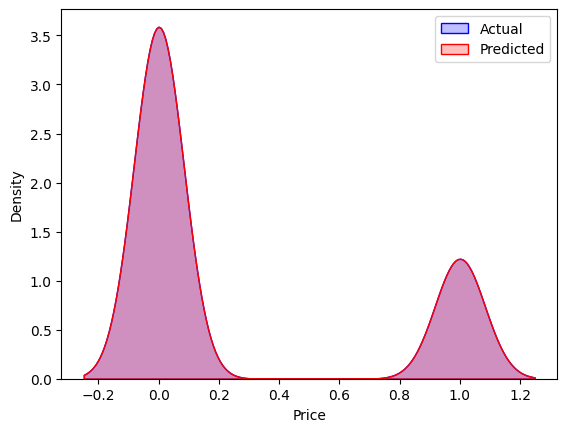

In [12]:
import seaborn as sns
sns.kdeplot(y_test_class, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_class, label='Predicted', color='red', fill=True)
plt.xlabel('Loan approved')
plt.ylabel('Density')
plt.legend()

По итогу получаем очень хорошие значения для логистической регрессии и вполне неплохие для линейной регрессии.

# Улучшение бейзлайна задачи классификации

Гипотезы для улучшения бейзлайна логистическйо классификации: \
- Обработка дисбаланса классов попробуем использовать SMOTE, чтобы улучшить это
- Попробуем использовать полиномиальные признаки
- Используем отбор признаков (Feature Selection), т.к. удаление нерелевантных  признаков может повысить точность
- Используем GridSearchCV для поиска лучших гиперпараметров

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

X = data_class_cleaned.drop(columns=['LoanApproved'], errors='ignore')
y = data_class_cleaned['LoanApproved']


smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# тестовая и обуч. выборки
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

#нормализация
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)
# полиномиальные признаки
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_class)
X_test_poly = poly.transform(X_test_class)

selector = SelectKBest(f_classif, k=10) # выберем лучшие признаки
X_train_selected = selector.fit_transform(X_train_poly, y_train_class)
X_test_selected = selector.transform(X_test_poly)

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1_weighted')
grid.fit(X_train_selected, y_train_class)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_selected)

print("best params:", grid.best_params_)
print("classif. accuracy:", accuracy_score(y_test_class, y_pred))

best params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
classif. accuracy: 0.9842312746386334


Гипотезы не улучшили и без того очень высокий уровень точности в 99.4%.

# Улучшение бейзлайна задачи регрессии
Теперь перейдем к задаче регрессии. Будем предсказывать charges

Гипотезы по улучшению: \
- Добавление полиномиальных признаков
- Отбор лучших признаков
- Гиперпараметрическая оптимизация: Регуляризация для повышения устойчивости модели

Добавим полиномиальные признаки, выполним отбор признаков.
Применим Ridge и Lasso регрессию для регуляризации и сравним их с бйзлайном

Ridge regr:
best alpha: 0.1
MSE: 27152147.829411343
R2: 0.8230910965829965

Lasso regr
best alpha: 1
MSE:  27151147.678417318
R2: 0.8230976130330657


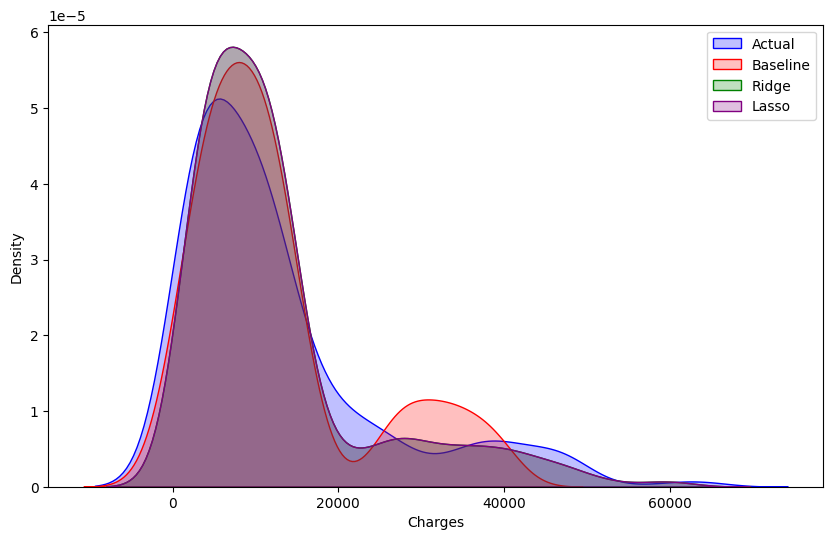

In [36]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_regr)
X_test_poly = poly.transform(X_test_regr)

#как и в примере  выше, отберем лучшие признаки
selector = SelectKBest(f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_poly, y_train_regr)
X_test_selected = selector.transform(X_test_poly)

ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_selected, y_train_regr)
ridge_best = ridge_grid.best_estimator_
ridge_pred = ridge_best.predict(X_test_selected)
print("Ridge regr:")
print("best alpha:", ridge_grid.best_params_['alpha'])
print("MSE:", mean_squared_error(y_test_regr, ridge_pred))
print("R2:", r2_score(y_test_regr, ridge_pred))

lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_selected, y_train_regr)
lasso_best = lasso_grid.best_estimator_
lasso_pred = lasso_best.predict(X_test_selected)
print("\nLasso regr")
print("best alpha:", lasso_grid.best_params_['alpha'])
print("MSE: ", mean_squared_error(y_test_regr, lasso_pred))
print("R2:", r2_score(y_test_regr, lasso_pred))

#посмотрим на результаты
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test_regr, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_regr, label='Baseline', color='red', fill=True)
sns.kdeplot(ridge_pred, label='Ridge', color='green', fill=True)
sns.kdeplot(lasso_pred, label='Lasso', color='purple', fill=True)
plt.xlabel('Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

Видно, что улучшения бейзлайна улучшили показатели R2 и MSE. Например, R2 улучшился на 11%, что является хорошим результатом.

# Самостоятельная имплементация логистической регрессии

Определим класс регрессора со всеми необходимыми функциями:

In [37]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = len(y)
        h = self.sigmoid(np.dot(X, self.theta))
        cost = (-1 / m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for i in range(self.max_iter):
            h = self.sigmoid(np.dot(X, self.theta))
            gradient = (1 / m) * np.dot(X.T, (h - y))
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        probabilities = self.sigmoid(np.dot(X, self.theta))
        return (probabilities >= 0.5).astype(int)

Проведем все те же действия - обучим бейзлайн

In [38]:
file_path = "loan.csv"
data_class = pd.read_csv(file_path)

data_class_cleaned = data_class.drop(columns=['ApplicationDate'], errors='ignore')

imputer = SimpleImputer(strategy='mean')
numerical_columns = data_class_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_class_cleaned[numerical_columns] = imputer.fit_transform(data_class_cleaned[numerical_columns])

categorical_columns = data_class_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_class_cleaned[column] = le.fit_transform(data_class_cleaned[column].astype(str))
    label_encoders[column] = le

X = data_class_cleaned.drop(columns=['LoanApproved'], errors='ignore')
y = data_class_cleaned['LoanApproved']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
sklearn_model = LogisticRegression(max_iter=1000)
sklearn_model.fit(X_train, y_train)
sklearn_pred = sklearn_model.predict(X_test)

print("Модель из sklearn:")
print("accuracy:", accuracy_score(y_test, sklearn_pred))

my_model = MyLogisticRegression(learning_rate=0.1, max_iter=1000)
my_model.fit(X_train, y_train)
my_pred = my_model.predict(X_test)

print("\nСобственная модель:")
print("accuracy:", accuracy_score(y_test, my_pred))


Модель из sklearn:
accuracy: 0.994

Собственная модель:
accuracy: 0.92725


Видно, что собственная реализация модели хоть и имеет высокий уровень accuracy, но он все же меньше, чем у библиотечной. Применим те же гипотезы по улучшнению качества модели.

Улучшенная собственная модель:
accuracy: 0.9395532194480947

Улучшенная библиотечная модель:
accuracy: 0.9837385019710907


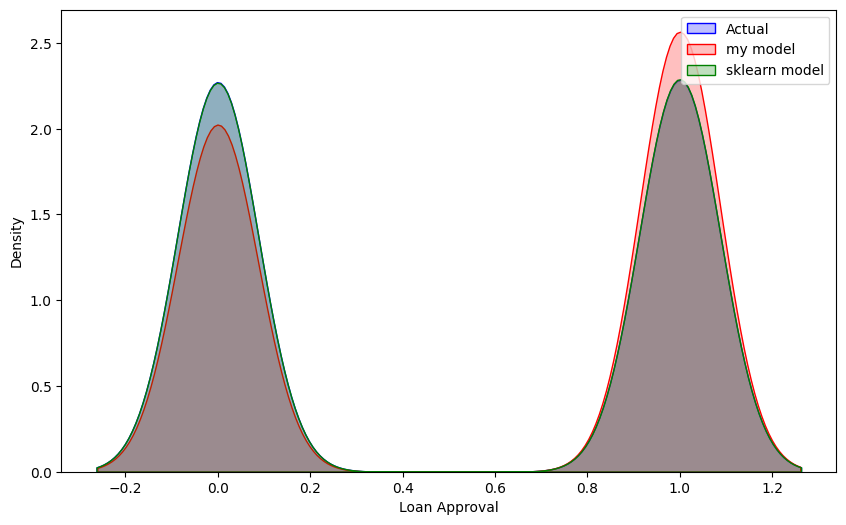

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

my_model = MyLogisticRegression(learning_rate=0.1, max_iter=1000)
my_model.fit(X_train_selected, y_train)
my_pred = my_model.predict(X_test_selected)

print("Улучшенная собственная модель:")
print("accuracy:", accuracy_score(y_test, my_pred))

sklearn_model = LogisticRegression(max_iter=1000)
sklearn_model.fit(X_train_selected, y_train)
sklearn_pred = sklearn_model.predict(X_test_selected)

print("\nУлучшенная библиотечная модель:")
print("accuracy:", accuracy_score(y_test, sklearn_pred))

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
sns.kdeplot(my_pred, label='my model', color='red', fill=True)
sns.kdeplot(sklearn_pred, label='sklearn model', color='green', fill=True)
plt.xlabel('Loan Approval')
plt.ylabel('Density')
plt.legend()
plt.show()


Видим, что собственная реализация все же не проявляет ту же точность, что и модель sklearn.

# Самостоятельная имплементация линейной регрессии:

Перейдем к самостоятельной имплементации классификации. Опишем класс, повторим действия по обучению

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

class MyLinearRegression:
    def __init__(self, lr, max_iter):
        self.coef = None
        self.itr = None
    def fit(self, X, y):
        x = np.c_[np.ones((X.shape[0], 1)), X]
        theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        self.itr = theta[0]
        self.coef = theta[1:]
    def predict(self, X):
        return np.dot(X, self.coef) + self.itr


file_path2 = "medical_insurance.csv"
data_regr = pd.read_csv(file_path2)

categorical_columns = data_regr.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_regr[column] = le.fit_transform(data_regr[column].astype(str))
    label_encoders[column] = le

X = data_regr.drop('charges', axis=1)
y = data_regr['charges']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

my_model = MyLinearRegression(lr=0.01, max_iter=1000)
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)

print("MSE = ", mean_squared_error(y_test, y_pred))
print("R2 = ", r2_score(y_test, y_pred))


MSE =  39922479.35435013
R2 =  0.7398864322395977


Видим R2 0.739, что вполне неплохо. Попробуем улучшить ситуацию. Удалим выбросы и применим остальные гипотезы


Улучшенная собственная модель:
MSE: 18330586.257962972
R2: 0.634035704144175

Улучшенная библиотечная модель:
MSE: 18330586.257962983
R2: 0.6340357041441748


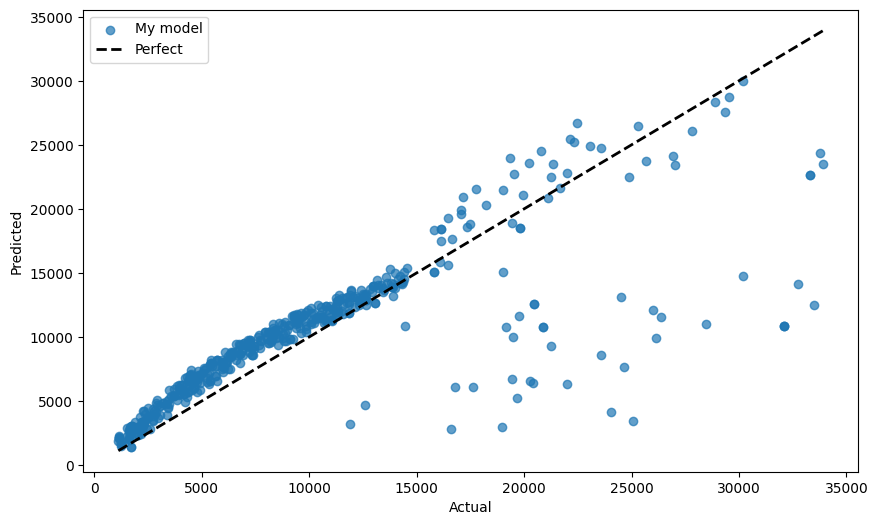

In [52]:
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
mask = (y >= lb) & (y <= ub)
X_cleaned, y_cleaned = X[mask], y[mask]

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

selector = SelectKBest(f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

my_model_optim = MyLinearRegression(lr=0.01, max_iter=2000)
my_model_optim.fit(X_train_selected, y_train)
y_pred_optimized = my_model_optim.predict(X_test_selected)

print("\nУлучшенная собственная модель:")
print("MSE:", mean_squared_error(y_test, y_pred_optimized))
print("R2:", r2_score(y_test, y_pred_optimized))

sklearn_model = LinearRegression()
sklearn_model.fit(X_train_selected, y_train)
y_pred_sklearn = sklearn_model.predict(X_test_selected)

print("\nУлучшенная библиотечная модель:")
print("MSE:", mean_squared_error(y_test, y_pred_sklearn))
print("R2:", r2_score(y_test, y_pred_sklearn))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, label='My model', alpha=0.7)
#plt.scatter(y_test, y_pred_sklearn, label='Sklearn model', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Видим, что улучшения ни привели к значительному улучшению результата - собственная реализация и библиотечная имеют очень схожую точность, но в целом низкую - 0.634